# Software Carpentry Workshop:  Lesson4: Data visualization with plotnine

---
## Instructor: Jees Augustine

*Email*: [jees.augustine@mavs.uta.edu](mailto:jees.augustine@mavs.uta.edu) 

*Git*: [@jeesaugustine](https://github.com/jeesaugustine/Software-Carpentry-Python)

## Introduction 

Python is one of the most powerful pieces of software for visualizing data. It is even possible to produce publication-quality graphics quite easily and reproducibly. Today, we will give you a flavor of some of the quality plotting you can produce quite readily using the Python package [plotnine](http://plotnine.readthedocs.io/en/stable/). plotnine is perhaps the best piece of software for intuitively producing high-quality figures, regardless of programming language. We will continue using the gapminder dataset and will visualize some of the trends in these data in R with [plotnine](http://plotnine.readthedocs.io/en/stable/). 

Note: This lesson is modified from the [Software Carpentry workshop on data visualization in R](https://github.com/AnnaWilliford/SWC_fall2017_lessons/blob/master/Software%20Carpentry%20Workshop-%20Lesson4-%20Data%20visualization%20with%20ggplot2.md).



---

## Objectives
* To be able to use `plotnine` to generate publication quality graphics.
* To understand the basic grammar of graphics, including the aesthetics and geometry layers, adding statistics, transforming scales, and coloring or panelling by groups.

### Keypoints
* Use `plotnine` to create plots.
* Think about graphics in layers: aesthetics, geometry, statistics, scale transformation, and grouping.
---
## Background 
Plotting our data is one of the best ways to quickly explore it and the various relationships between variables.

There are three main plotting systems in Python, the [matplotlib](http://matplotlib.org), [seabourn](http://seabourn.com), and [Bokeh](https://community.modeanalytics.com/python/libraries/bokeh/) packages. 

Today we'll be learning about the `plotnine` package, because it is the most effective for creating publication quality graphics.


`plotnine` is built on the grammar of graphics, the idea that any plot can be expressed from the same set of components: a **data set**, a **coordinate system**, and a set of **geoms**--the visual representation of data points

The key to understanding `plotnine` is thinking about a figure in layers. This idea may be familiar to you if you have used image editing programs like Photoshop, Illustrator, or Inkscape.

## Quickstart
---
We must first make sure our gapminder dataset has been loaded into Python, if it isn't already.




In [26]:
####### import statements ##########
import pandas as pd
from plotnine import *
####### End import      ##########

my_file = pd.read_table("gapminder.txt")

Let's start off with an example:

In [4]:
my_file.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


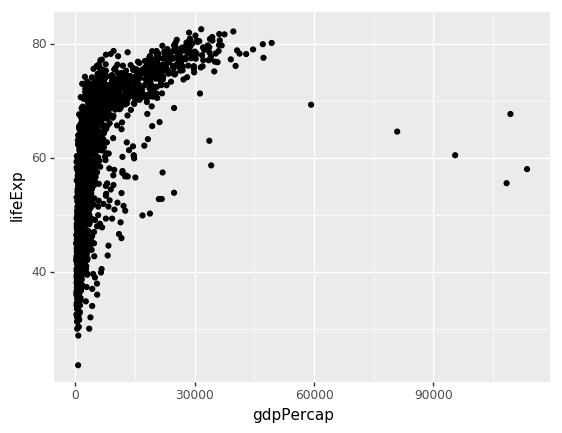

<ggplot: (-9223372036574345363)>

In [5]:
(ggplot(my_file) + aes(x = 'gdpPercap', y ='lifeExp') + geom_point())

So the first thing we do is call the `ggplot` function. This function lets Python know that we're creating a new plot, and any of the arguments we give the `ggplot` function are the global options for the plot: they apply to all layers on the plot.

We've passed in two arguments to ggplot. 
First, we tell `ggplot` what data we want to show on our figure, in this example the gapminder data we read in earlier. For the second argument we passed in the `aes` function, which tells ggplot how variables in the data map to aesthetic properties of the figure, in this case the **x** and **y** locations. Here we told `ggplot` we want to plot the `"gdpPercap"` column of the gapminder data frame on the x-axis, and the "lifeExp" column on the y-axis. Notice that we didn't need to explicitly pass `aes` these columns (e.g. x = gapminder[, "gdpPercap"]), this is because ggplot is smart enough to know to look in the data for that column!

By itself, the call to `ggplot` isn't enough to draw a figure:

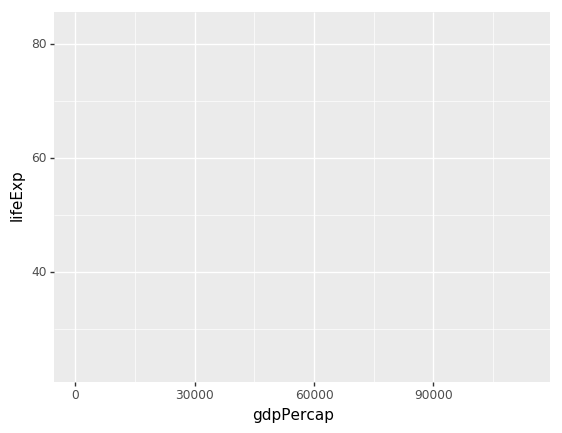

<ggplot: (-9223372036574315397)>

In [6]:
(ggplot(my_file) + aes(x = 'gdpPercap', y = 'lifeExp') )

We need to tell `ggplot` how we want to visually represent the data, which we do by adding a new **geom** layer. 

In our example, we used geom_point, which tells ggplot we want to visually represent the relationship between **lifeExp** and **gdpPercap** as a scatterplot of points:



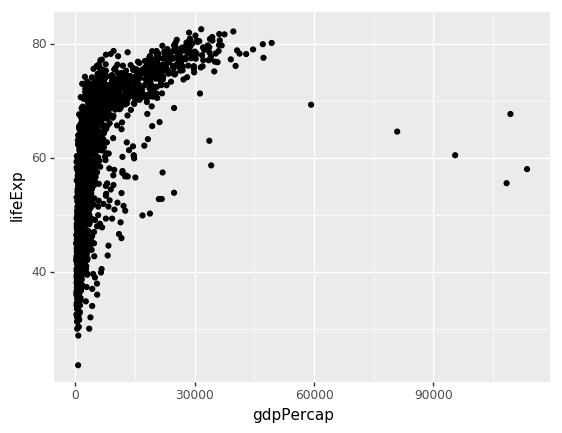

<ggplot: (285641406)>

In [7]:
(ggplot(my_file) + aes(x = 'gdpPercap', y = 'lifeExp') + geom_point())

> ### Challenge 1
>
> Modify the example so that the figure shows how life expectancy has changed over time:
> 
>
> ggplot(data = gapminder, aes(x = gdpPercap, y = lifeExp)) + geom_point()
>
> Hint: the gapminder dataset has a column called "year", which should appear on the x-axis.
>> #### Solution to challenge 1
>> Here is one solution 
>> 

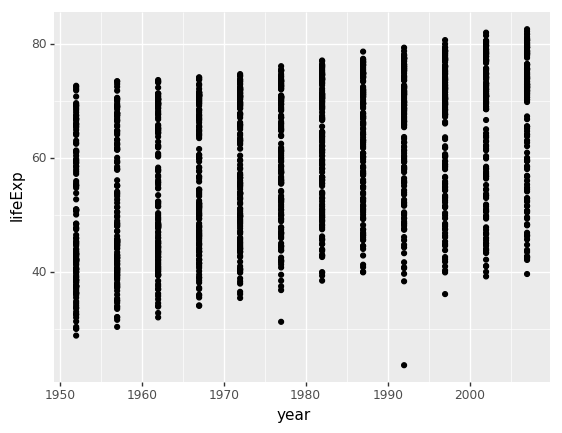

<ggplot: (-9223372036569040110)>

In [8]:
(ggplot(my_file) + aes(x='year', y='lifeExp') + geom_point())

> ### Challenge 2
> In the previous example and challenge we've used the `aes` function to tell the scatterplot geom about the x and y locations of each point. Another aesthetic property we can modify is the point color. Modify the code from the previous challenge to color the points by the "continent" column. What trends do you see in the data? Are they what you expected?
>> #### Solution to challenge 2
>> In the previous examples and challenge we've used the aes function to tell the scatterplot geom about the **x** and **y** locations of each point. Another aesthetic property we can modify is the point color. Modify the code from the previous challenge to color the points by the "continent" column. What trends do you see in the data? Are they what you expected?

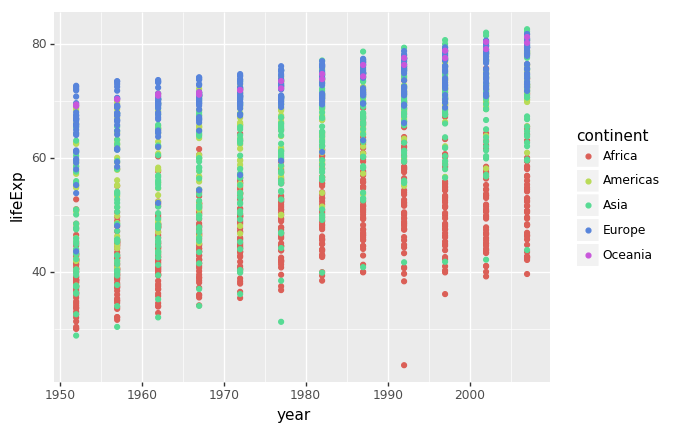

<ggplot: (-9223372029316038838)>

In [9]:
(ggplot(my_file) + aes(x = 'year', y = 'lifeExp', color='continent') + geom_point())

# Layers 
Using a scatterplot probably isn't the best for visualizing change over time. Instead, let's tell `ggplot` to visualize the data as a line plot:



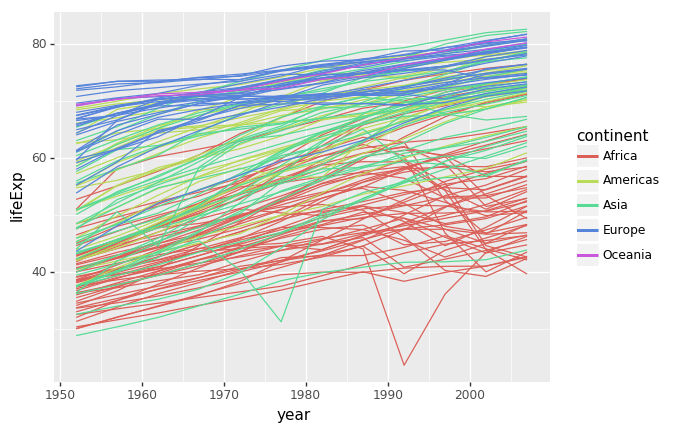

<ggplot: (285665607)>

In [10]:
(ggplot(my_file) + aes(x = 'year', y = 'lifeExp', by= 'country', color='continent') + geom_line())

Instead of adding a geom_point layer, we've added a geom_line layer. We've added the by aesthetic, which tells ggplot to draw a line for each country.

But what if we want to visualize both lines and points on the plot? We can simply add another layer to the plot:

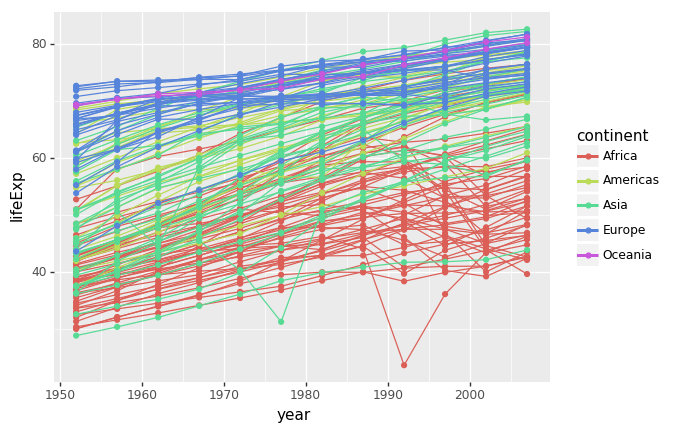

<ggplot: (7538977249)>

In [11]:
(ggplot(my_file) + aes(x = 'year', y = 'lifeExp', by= 'country', color='continent') + geom_line() + geom_point())

It's important to note that each layer is drawn on top of the previous layer. In this example, the points have been drawn on top of the lines. Here's a demonstration:

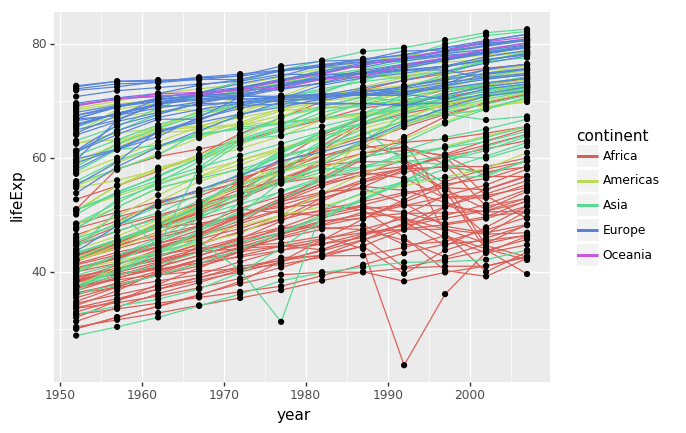

<ggplot: (-9223372036579417775)>

In [12]:
(ggplot(my_file) + aes(x = 'year', y = 'lifeExp', by= 'country') + geom_line(aes(color='continent'))+ geom_point())

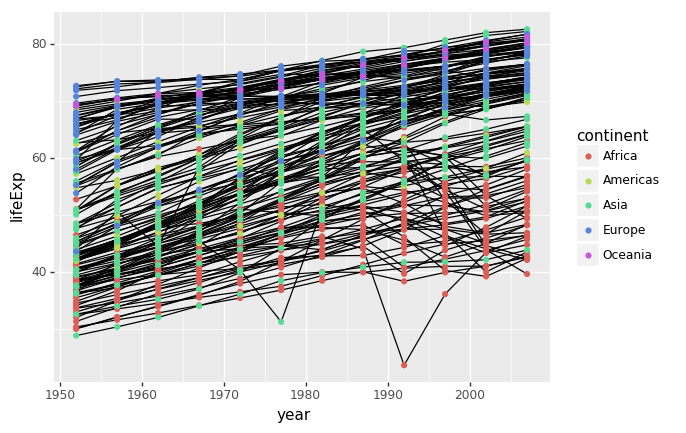

<ggplot: (-9223372029315122267)>

In [13]:
(ggplot(my_file) + aes(x = 'year', y = 'lifeExp', by= 'country') + geom_line()+ geom_point(aes(color='continent')))

In this example, the aesthetic mapping of color has been moved from the global plot options in ggplot to the geom_line layer so it no longer applies to the points. Now we can clearly see that the points are drawn on top of the lines.

> ## Top: Setting an aesthetic to a value instead of a mapping 
> So far, we've seen how to use an aesthetic (such as **color**) as a mapping to a variable in the data. 
For example, when we use `geom_line(aes(color=continent))`, ggplot will give a different color to each continent. But what if we want to change the colour of all lines to blue? You may think that geom_line(aes(color="blue")) should work, but it doesn't. Since we don't want to create a mapping to a specific variable, we simply move the color specification outside of the aes() function, like this: geom_line(color="blue").


> ### Challenge 3
> Switch the order of the point and line layers from the previous example. What happened?
>> Solution to challenge 3
>> Switch the order of the point and line layers from the previous example. What happened?

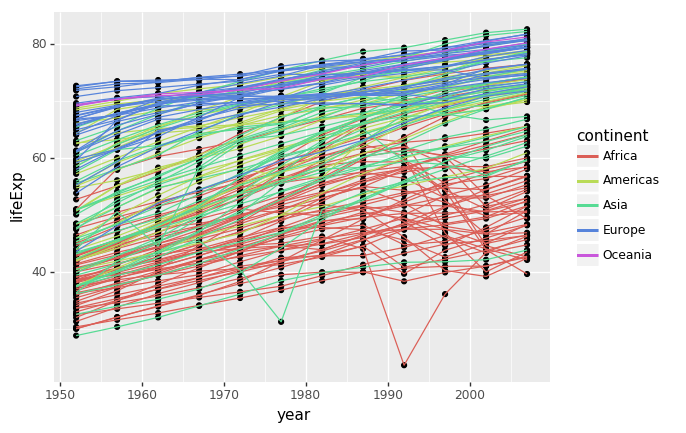

<ggplot: (-9223372036569006613)>

In [14]:
(ggplot(my_file) + aes(x = 'year', y = 'lifeExp', by= 'country') + geom_point() + geom_line(aes(color='continent')))

The lines now get drawn over the points!

## Transformations and statistics
`ggplot` also makes it easy to overlay statistical models over the data. To demonstrate we'll go back to our first example:

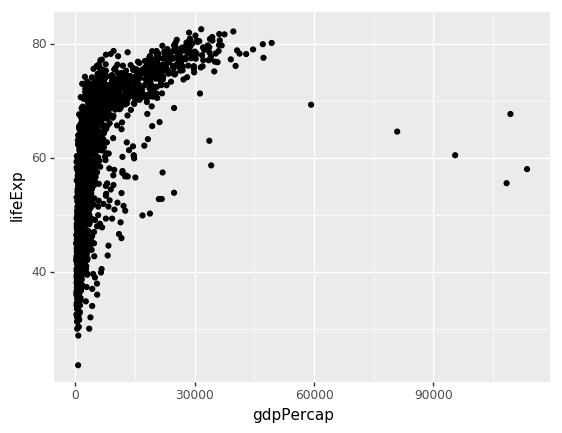

<ggplot: (285665712)>

In [15]:
(ggplot(my_file) + aes(x = 'gdpPercap', y = 'lifeExp') + geom_point())

Currently it's hard to see the relationship between the points due to some strong outliers in GDP per capita. We can change the scale of units on the x axis using the scale functions. These control the mapping between the data values and visual values of an aesthetic. We can also modify the transparency of the points, using the alpha function, which is especially helpful when you have a large amount of data which is very clustered.

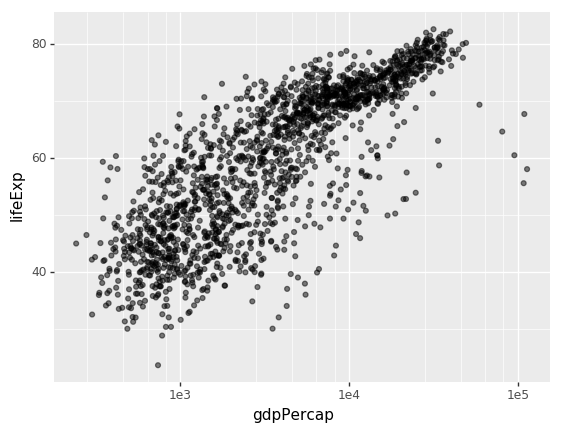

<ggplot: (7539295573)>

In [16]:
(ggplot(my_file) + aes(x = 'gdpPercap', y = 'lifeExp') + geom_point(alpha = 0.5) + scale_x_log10())

The `log10` function applied a transformation to the values of the gdpPercap column before rendering them on the plot, so that each multiple of 10 now only corresponds to an increase in 1 on the transformed scale, e.g. a GDP per capita of 1,000 is now 3 on the y axis, a value of 10,000 corresponds to 4 on the y axis and so on. This makes it easier to visualize the spread of data on the x-axis.
> ### Tip Reminder: Setting an aesthetic to a value instead of a mapping
> Notice that we used `geom_point(alpha = 0.5)`. As the previous tip mentioned, using a setting outside of the `aes()` function will cause this value to be used for all points, which is what we want in this case. But just like any other aesthetic setting, alpha can also be mapped to a variable in the data. For example, we can give a different transparency to each continent with `geom_point(aes(alpha = continent))`.

We can fit a simple relationship to the data by adding another layer, geom_smooth:

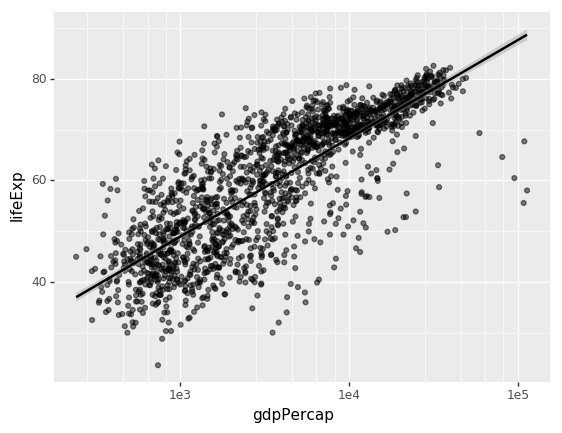

<ggplot: (7538962906)>

In [17]:
(ggplot(my_file) + aes(x = 'gdpPercap', y = 'lifeExp') + geom_point(alpha = 0.5) \
 + scale_x_log10() + geom_smooth(method='lm'))

We can make the line thicker by setting the **size** aesthetic in the geom_smooth layer:

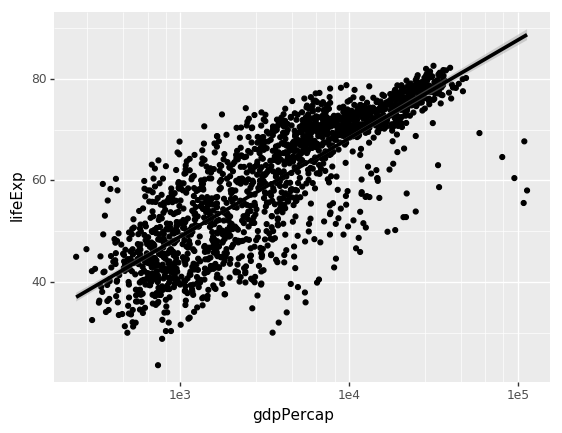

<ggplot: (7540112809)>

In [18]:
(ggplot(my_file) + aes(x = 'gdpPercap', y = 'lifeExp') + geom_point() \
 + scale_x_log10() + geom_smooth(method='lm', size=1.5))

There are two ways an aesthetic can be specified. Here we set the **size** aesthetic by passing it as an argument to `geom_smooth`. Previously in the lesson we've used the `aes` function to define a *mapping* between data variables and their visual representation.
> ### Challenge 4a
> Modify the color and size of the points on the point layer in the previous example.

> Hint: do not use `aes` function
>> #### Solution to challenge 4a
>> Modify the color and size of the points on the point layer in the previous example.

>> Hint: do not use the aes function.

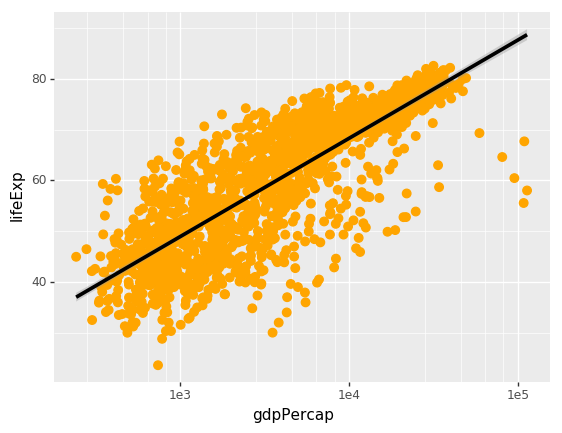

<ggplot: (7539156358)>

In [19]:
(ggplot(my_file) + aes(x = 'gdpPercap', y = 'lifeExp') + geom_point(size = 3, color='orange') \
 + scale_x_log10() + geom_smooth(method='lm', size=1.5))

> ### Challenge 4b
> Modify your solution to Challenge 4a so that the points are now a different shape and are colored by continent with new trendlines. 

>Hint: The color argument can be used inside the aesthetic.

>> #### Solution to challenge 4b
>> Modify Challenge 4 so that the points are now a different shape and are colored by continent with new trendlines.

>> Hint: The color argument can be used inside the aesthetic.


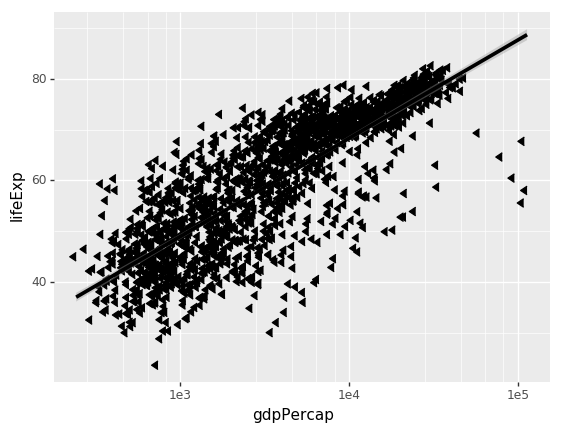

<ggplot: (7539169193)>

In [20]:
(ggplot(my_file) + aes(x = 'gdpPercap', y = 'lifeExp') + geom_point(size=3, shape=8) \
 + scale_x_log10() + geom_smooth(method='lm', size=1.5))

## Multi-panel figures

Earlier we visualized the change in life expectancy over time across all countries in one plot. Alternatively, we can split this out over multiple panels by adding a layer of **facet** panels. Focusing only on those countries with names that start with the letter "A" or "Z".

> ###Tip
> We start by subsetting the data. We use the `str.startswith()` function to pull out the first part of a string; We try to get the dtaframe which has countries which starts.with == "A" | starts.with == "Z")`



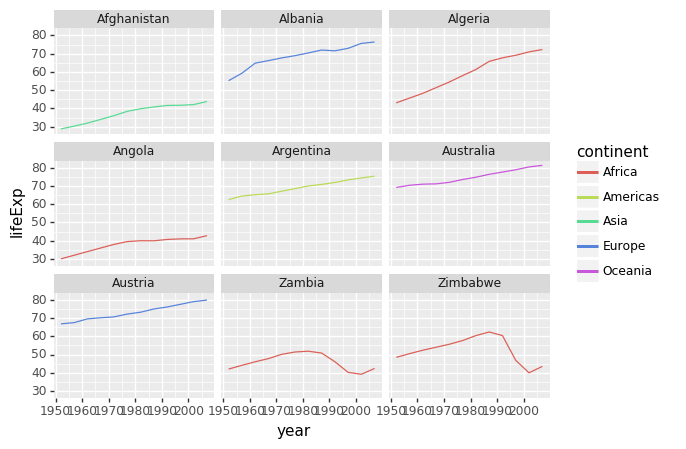

<ggplot: (-9223372029315766419)>

In [21]:
countries = my_file[my_file.country.str.startswith('A') | my_file.country.str.startswith('Z')]
(ggplot(countries) + aes(x = 'year', y = 'lifeExp', color='continent') + geom_line() + \
   facet_wrap('country'))

The `facet_wrap` layer took a "formula" as its argument, denoted by the tilde (~). This tells R to draw a panel for each unique value in the country column of the gapminder dataset.

## Modifying text
---
To clean this figure up for a publication we need to change some of the text elements. The x-axis is too cluttered, and the y axis should read "*Life expectancy*", rather than the column name in the data frame.


We can do this by adding a couple of different layers. The theme layer controls the axis text, and overall text size. Labels for the axes, plot title and any legend can be set using the labs function. Legend titles are set using the same names we used in the aes specification. Thus below the color legend title is set using color = "Continent", while the title of a fill legend would be set using fill = "MyTitle"`.




In [22]:
(ggplot(countries) + aes(x = 'year', y = 'lifeExp', color='continent') + geom_line() + \
   facet_wrap('country') + \
   labs(
       x = 'Year',
       y = 'Life expectancy',
       title = 'Figure 1',      # main title of figure
       color = 'Continent'      # title of legend
   )+\
   theme(axis.text.x=element_blank(), axis.ticks.x=element_blank())
)

SyntaxError: keyword can't be an expression (<ipython-input-22-700e1c1d2237>, line 7)

This is a taste of what you can do with `Plotnine`. More extensive documentation is available on the website. Finally, if you have no idea how to change something, a quick Google search will usually send you to a relevant question and answer on Stack Overflow with reusable code to modify!

> ## Challenge 5
> Create a density plot of GDP per capita, filled by continent
> Advanced:
> * Transform the x axis to better visualise the data spread.
> * Add a facet layer to panel the density plots by year.
>> Solution to challenge 5
>> Create a density plot of GDP per capita, filled by continent.
>> Advanced:
>> * Transform the x axis to better visualise the data spread.
>> * Add a facet layer to panel the density plots by year.

In [ ]:
(ggplot(countries) + aes(x = 'gdpPercap', color='continent') + geom_density(alpha=0.6) +  \
  geom_density(alpha=0.6) + facet_wrap('year') + scale_x_log10())

# Demo some more advanced features
---
If time permits, the following interactive activities can be run to showcase some of the cool stuff you can do with ggplot and `Python`.

Let's do this in terms of one of the cooler visualizations directly from the [Gapminder website](https://www.gapminder.org/tools/#_chart-type=bubbles). This visualization shows the relationship between income and life expectancy for all nations in the dataset. The points are scaled in size based on the population size of the nation and colored based on continent. So there is a lot of details here.

> ### Challenge 6a
> Can we create something pretty similar using `plotnine`? What variables in our dataset needs to be mapped to what aesthetics to achive this?
>> ### Solution to challenge 6a
>> x = income y = life expectancy size = population size color = continent

In [ ]:
(ggplot(countries) + aes(x = 'gdpPercap',  y = 'lifeExp',  size ='pop', color = 'continent') + geom_point())

> ### Challenge 6a
> Can we create something pretty similar using `plotnine`? What variables in our dataset needs to be mapped to what aesthetics to achive this?
>> ### Solution to challenge 6a
>> x = income y = life expectancy size = population size color = continent

In [ ]:
year_2007 = my_file[my_file.year == 2007]
bubble = (ggplot(year_2007) + aes(x = 'gdpPercap',  y = 'lifeExp',  size ='pop', color = 'continent') + geom_point() + \
          labs(
              x = "Income",            # x axis title
              y = "Life expectancy"    # y axis title
          )
         )

In [ ]:
bubble

### How to save a file as any format 


In [23]:
year_2007 = my_file[my_file.year == 2007]
bubble = (ggplot(year_2007) + aes(x = 'gdpPercap',  y = 'lifeExp',  size ='pop', color = 'continent') + geom_point() + \
          labs(
              x = "Income",            # x axis title
              y = "Life expectancy"    # y axis title
          )
         )


In [25]:
ggsave(bubble, filename='bubble.png')

/Users/jeesaugustine/anaconda/lib/python3.6/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/Users/jeesaugustine/anaconda/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: bubble.png
  warn('Filename: {}'.format(filename))


**[More Infor on plotnine]** : https://plotnine.readthedocs.io